### B) Implement the same program in python, using the built-in convolution functions in Pytorch.

In [4]:
# IMPORTS
import os
import math
import cv2
import numpy as np
 
import torch 
import torch.nn as nn 
import torchvision.transforms as T 
from PIL import Image

In [5]:
torch.cuda.is_available()

True

In [6]:

IMAGE_WIDTH = 512
IMAGE_HEGHT = 256

In [7]:

def read_images(input_folder_path):
    images = []
    images_names = []
    for image_name in os.listdir(input_folder_path):
        image = cv2.imread(input_folder_path + '/' + image_name)
        if image is not None:
            images.append(image)
            images_names.append(image_name)
        
    return images, images_names

def save_images(output_folder, images, images_names):
    for image, image_name in zip(images, images_names):
        print(image_name)
        cv2.imwrite(output_folder + '/' + image_name, image)


def read_mask(mask_file_path):
    with open(mask_file_path) as mask_file:
        mask_size = int(next(mask_file))
        mask = []
        for line in mask_file:
            mask.append([float(x) for x in line.split()])  
        return mask_size, mask
    

images, names = read_images('./input')
# save_images('./output' , images, names)

mask_size, mask = read_mask('mask.txt')


Input Tensor : torch.Size([1, 3, 256, 512])
Mask Tensor : torch.Size([1, 1, 9, 9])
Output Tensor : torch.Size([1, 1, 262, 518])


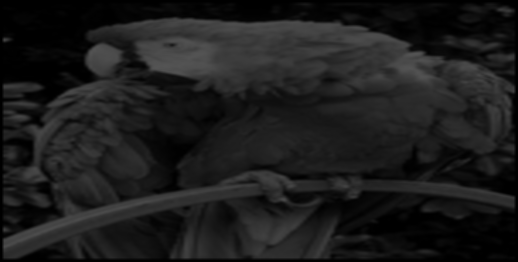

In [8]:

# Read the image file 
image = Image.open('./input/bird1.jpg') 

# convert input image to torch tensor 
Input = T.ToTensor()(image) 
    
# unsqueeze image to make 4D 
Input = Input.unsqueeze(0) 
print('Input Tensor :',Input.shape) 

# Convert the kernel values to a PyTorch tensor
mask_tensor = torch.tensor(mask, dtype=torch.float)

# Reshape the mask tensor to match the expected shape by Conv2d
mask_tensor = mask_tensor.reshape(1, 1, mask_size, mask_size) 
# mask_tensor = torch.tensor(mask, dtype=torch.float).reshape(1, 1, 3, 3)

print('Mask Tensor :',mask_tensor.shape)

padding = math.floor(mask_size / 2)

  
# Define the convolution operation 
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=padding, bias=False) 

# Define the uniform weights for the kernel
uniform_weight = torch.ones((1, 3, 3, 3), dtype=torch.float32) / (mask_size * mask_size)
# Both should have consistent dimensions for 3x3 kernel.

# Manually set the weights of the convolutional layer
with torch.no_grad():  # Disable gradient tracking to avoid unnecessary computation
    conv.weight.copy_(uniform_weight)
  
output = conv(Input) 
  
print('Output Tensor :',output.shape) 

# squeeze image 
Out_img = output.squeeze(0) 
  
# convert tensor to image 
Out_img = T.ToPILImage()(Out_img) 
Out_img

In [12]:
def convolution(images, mask, mask_size, width=0, height=0, batch_size=1):
    iterations = math.ceil(len(images) / batch_size)
    out_images = []
    for i in range(iterations):
		# convert input image to torch tensor 
        Input = T.ToTensor()(images[i]) 
			
		# unsqueeze image to make 4D 
        Input = Input.unsqueeze(0) 
        # print('Input Tensor :',Input.shape) 

		# Convert the kernel values to a PyTorch tensor
        mask_tensor = torch.tensor(mask, dtype=torch.float)

		# Reshape the mask tensor to match the expected shape by Conv2d
        mask_tensor = mask_tensor.reshape(1, 1, mask_size, mask_size) 
		# mask_tensor = torch.tensor(mask, dtype=torch.float).reshape(1, 1, 3, 3)

        # print('Mask Tensor :',mask_tensor.shape)

        padding = math.floor(mask_size / 2)

		
		# Define the convolution operation 
        conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=padding, bias=False) 

		# Define the uniform weights for the kernel
        uniform_weight = torch.ones((1, 3, 3, 3), dtype=torch.float32) / (mask_size * mask_size)
		# Both should have consistent dimensions for 3x3 kernel.

		# Manually set the weights of the convolutional layer
        with torch.no_grad():  # Disable gradient tracking to avoid unnecessary computation
        	conv.weight.copy_(uniform_weight)
        output = conv(Input)
		
        # print('Output Tensor :',output.shape) 

		# squeeze image 
        Out_img = output.squeeze(0) 
		
		# convert tensor to image 
        Out_img = T.ToPILImage()(Out_img) 
        out_images.append(np.array(Out_img))
    return out_images


In [20]:
#Test
images, names = read_images('./input')
print(len(images))
mask_size, mask = read_mask('mask.txt')
out_images = convolution(images,mask,mask_size)
out_images[3].show()
save_images('./output' , out_images, names)


9
bird1.jpg


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
